In [97]:
import pandas as pd

In [99]:
df = pd.read_csv('../data/data.csv',encoding='gbk')
display(df.head())
display(df.info())

,DataId,时间,分类,类型,金额,币种,账户1,账户2,备注,已报销,手续费,优惠券,记账者,账单标记,账单图片
0,qj165659401584418058,2022/6/30 21:00,聚会,支出,42.0,CNY,NaN,NaN,披萨,NaN,NaN,NaN,NaN,NaN,NaN
1,qj165658025951419295,2022/6/30 17:10,住房,支出,1000.0,CNY,NaN,NaN,租房,NaN,NaN,NaN,NaN,NaN,NaN
2,qj165657373122911152,2022/6/30 15:22,地铁,支出,7.0,CNY,NaN,NaN,龙胜,NaN,NaN,NaN,NaN,NaN,NaN
3,qj165657372370911775,2022/6/30 15:21,地铁,支出,7.0,CNY,NaN,NaN,前海,NaN,NaN,NaN,NaN,NaN,NaN
4,qj165650981563912358,2022/6/29 21:36,购物,支出,28.0,CNY,NaN,NaN,朴朴,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DataId  980 non-null    object 
 1   时间      980 non-null    object 
 2   分类      980 non-null    object 
 3   类型      980 non-null    object 
 4   金额      980 non-null    float64
 5   币种      980 non-null    object 
 6   账户1     0 non-null      float64
 7   账户2     0 non-null      float64
 8   备注      945 non-null    object 
 9   已报销     0 non-null      float64
 10  手续费     0 non-null      float64
 11  优惠券     0 non-null      float64
 12  记账者     0 non-null      float64
 13  账单标记    0 non-null      float64
 14  账单图片    0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 115.0+ KB


None

In [135]:
df['备注'] = df['备注'].fillna('')

# 每个月每天的支出日历图

In [100]:
# 计算每一天金额
df1 = df[['时间','金额']]
df1['时间'] = pd.to_datetime(
                df1['时间'],
                infer_datetime_format=True
).dt.normalize()
df1 = df1.groupby('时间').sum().reset_index()
df1.head()

<ipython-input-100-0d681cd5a2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['时间'] = pd.to_datetime(


,时间,金额
0,2021-07-01,103.0
1,2021-07-03,259.5
2,2021-07-04,221.0
3,2021-07-07,96.0
4,2021-07-09,67.5


In [129]:
import datetime
from pyecharts import options as opts
from pyecharts.charts import Calendar


money = list(df1['金额'])
begin = datetime.date(2021, 7, 1)
end = datetime.date(2022, 6, 30)
data = [
    [z[0], z[1]]
    for z in zip(list(df1['时间']), list(df1['金额']))
]

calendar = (
    Calendar()
    .add(
        "",
        data,
        calendar_opts=opts.CalendarOpts(
            range_=['2021-07-01', '2022-06-30'],
            daylabel_opts=opts.CalendarDayLabelOpts(name_map="cn"),
            monthlabel_opts=opts.CalendarMonthLabelOpts(name_map="cn"),
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="21.7-22.6支出情况总览"),
        visualmap_opts=opts.VisualMapOpts(
            max_=500,
            min_=0,
            orient="horizontal",
            is_piecewise=True,
            pos_top="230px",
            pos_left="100px",
            pieces=[
              {"min": 0, "max": 15},
              {"min": 16, "max": 50},
              {"min": 51, "max": 150},
              {"min": 151, "max": 500},
              {"min": 500},
            ]
        ),
    )
)
calendar.render('../output/每日支出明细.html')
calendar.render_notebook()

小编毕业后去了某银行信用卡中心，银行有饭卡，基本上一日三餐都在食堂，没花太多钱，甚至有时候难得记账才有那么多空白，在11月底办了一张信用卡，接下来天天点外卖，所以颜色看起来充实了起来。

# 每个月的支出走势图

In [103]:
df2 = df[['时间','金额']]
df2['时间'] = pd.to_datetime(
                df2['时间'],
                infer_datetime_format=True,
).dt.normalize()
df2['时间'] = df2['时间'].map(lambda x: x.month)
df2 = df2.groupby('时间').sum().reset_index()
x = list(df2['时间'])[6:] + list(df2['时间'])[:6]
x = list(map(str, x))
y = list(df2['金额'])[6:] + list(df2['金额'])[:6]

<ipython-input-103-17da176d5bed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['时间'] = pd.to_datetime(
<ipython-input-103-17da176d5bed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['时间'] = df2['时间'].map(lambda x: x.month)


In [131]:
import pyecharts.options as opts
from pyecharts.charts import Line


line = (
    Line()
    .add_xaxis(x)
    .add_yaxis(
        "",
        y,
        markpoint_opts=opts.MarkPointOpts(
            data=[opts.MarkPointItem(
                    type_="average"
                )
            ]
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="支出趋势"))
)
line.render('../output/每月支出趋势.html')
line.render_notebook()

# 消费去向词云

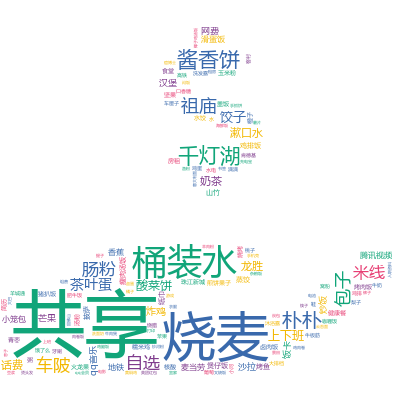

In [148]:
from IPython.display import Image 
import stylecloud


word = ' '.join(list(df['备注']))
stylecloud.gen_stylecloud(word, collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-hand-holding-usd',
                          size=400,
                          output_name='../output/消费去向词云.png'
)
Image(filename='../output/消费去向词云.png')

# 支出分类占比图

In [154]:
df3 = df['分类'].value_counts().reset_index()
df3.head()

,index,分类
0,外卖,166
1,早餐,124
2,地铁,95
3,午餐,84
4,购物,61


In [169]:
from pyecharts import options as opts
from pyecharts.charts import Pie


c = (
    Pie()
    .add(
        "",
        [list(z) for z in zip(list(df3['index']), list(df3['分类']))],
        label_opts=opts.LabelOpts(
            formatter="{b}:{c} {d}%  ",
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title=""),
                    legend_opts=opts.LegendOpts(is_show=False))
)
c.render('../output/支出分类占比.html')
c.render_notebook()

# 吃：外卖喜欢吃啥

In [191]:
df5 = df[['分类','金额','备注']]
df5 = df5[(df5['分类'] == '外卖')
         ]
df5 = df5[df5['备注'] != '']

df5

,分类,金额,备注
5,外卖,16.0,拌饭
7,外卖,18.0,披萨
9,外卖,10.0,米线
10,外卖,16.0,肠粉
11,外卖,16.0,汉堡
...,...,...,...
939,外卖,17.0,叉烧拉面
941,外卖,14.0,咖喱鸡排饭
956,外卖,15.0,饺子
963,外卖,17.0,鸡腿饭


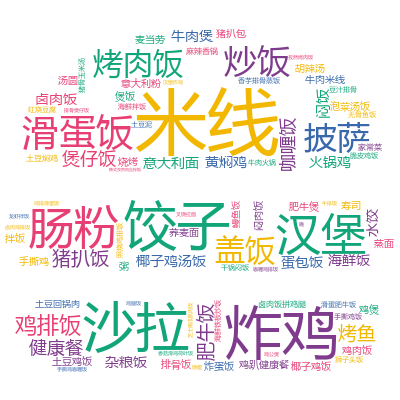

In [193]:
from IPython.display import Image 
import stylecloud


word = ' '.join(list(df5['备注']))
stylecloud.gen_stylecloud(word, collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-hamburger',
                          size=400,
                          output_name='../output/外卖词云.png'
)
Image(filename='../output/外卖词云.png')

# 住：每个月水电情况

In [202]:
df6 = df[['分类','金额','时间']]
df6 = df6[(df6['分类'] == '水电煤')]
df6['时间'] = pd.to_datetime(
                df6['时间'],
                infer_datetime_format=True,
).dt.normalize()
df6['时间'] = df6['时间'].map(lambda x: x.month)
df6 = df6.groupby('时间').sum().reset_index()
x = list(df6['时间'])[4:] + list(df6['时间'])[:4]
x = list(map(str, x))
y = list(df6['金额'])[4:] + list(df6['金额'])[:4]

In [209]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker

c = (
    Bar()
    .add_xaxis(x)
    .add_yaxis("水电费", y)
    .reversal_axis()
    .set_series_opts(label_opts=opts.LabelOpts(position="right"))
    .set_global_opts(title_opts=opts.TitleOpts(title="每月水电费"))
)
c.render('../output/每月水电费.html')
c.render_notebook()

# 二八法则画出80%消费是什么类型提供的

In [219]:
k_m = df.groupby('分类').sum()['金额'].reset_index()
k_m = k_m.sort_values(by=['金额'],ascending=False)
k_m['总支出'] = k_m['金额'].sum()
# 计算销售额占比
k_m['支出占比'] = k_m['金额'] / k_m['总支出']
zhanbi = list(k_m['支出占比'])
neiji = []
for i in range(len(zhanbi)):
    if i == 0:
        neiji.append(zhanbi[i])
    else:
        neiji.append(neiji[i-1]+zhanbi[i])
k_m['累计占比'] = neiji
# 判断累加值是否大于 80%
k_m['flag'] = k_m['累计占比'].map(lambda x: 1 if x < 0.8 else 0)
k_m

,分类,金额,总支出,支出占比,累计占比,flag
4,住房,12030.00,57030.92,0.210938,0.210938,1
7,医疗,6481.00,57030.92,0.113640,0.324578,1
5,其它,5020.00,57030.92,0.088022,0.412601,1
27,购物,4055.54,57030.92,0.071111,0.483712,1
23,聚会,4029.00,57030.92,0.070646,0.554358,1
13,学习,3252.00,57030.92,0.057022,0.611380,1
9,发红包,2600.00,57030.92,0.045589,0.656969,1
11,外卖,2497.00,57030.92,0.043783,0.700752,1
0,三餐,2495.50,57030.92,0.043757,0.744509,1
2,交通,1840.00,57030.92,0.032263,0.776772,1


In [227]:
# 绘制帕累托图
import pyecharts.options as opts
from pyecharts.charts import Bar, Line
from pyecharts.commons.utils import JsCode


# 选出占比达到 80% 的销售额
m = list(k_m[k_m['flag'] == 1]['金额'])[-1]

x_data = list(k_m['分类'])

color_function = """
        function (params) {
            if (params.value >= %s) {
                return '#749f83';
            } else  {
                return '#d48265';
            }
        }
        """ % str(m)
bar = (
    Bar()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="金额",
        y_axis=list(k_m['金额']),
        z=0,
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color=JsCode(color_function))
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="支出占比",
            type_="value",
            min_=0,
            max_=1.1,
            #interval=5,
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )
    )
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(
            is_show=True, trigger="axis", axis_pointer_type="cross"
        ),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            axislabel_opts=opts.LabelOpts(rotate=-75),
            axispointer_opts=opts.AxisPointerOpts(is_show=True, type_="shadow"),
        ),
        yaxis_opts=opts.AxisOpts(
            name="金额",
            type_="value",
            #min_=0,
            #max_=250,
            #interval=50,
            axislabel_opts=opts.LabelOpts(formatter="{value} 元"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        legend_opts=opts.LegendOpts(
            type_="scroll",
        )
    )
)

line = (
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="支出累计占比",
        yaxis_index=1,
        y_axis=list(k_m['累计占比']),
        label_opts=opts.LabelOpts(is_show=False),
        z=1,
        markline_opts=opts.MarkLineOpts(data=[opts.MarkLineItem(y=0.8)])
    )
)

bar.overlap(line).render('../output/帕累托图.html')
bar.overlap(line).render_notebook()